# Variational Inference(변분추론): Bayesian Neural Netwrok

## 1.Introduction

복잡한 분포를 간단한 형태로 approximatation(근사) 하는것.  
posterior distribution(사후분포)를 간단한 분포로 근사하는것.

### 1.1 Probabilistic programming & bayesian inference

* **probabilistic programming** 은 확률적인 모델을 만들고 이를 바탕으로 추론하는 프로그래밍의 한 트렌드.  
* *Bayesian* 프레임워크 를 바탕으로한 추론 방법.  
  
  
#### bayesian inference


베이지안 추론은 '불완전한 데이터'와 사전지식 또는 믿음 을 이용하여 통계적인 추론을 하는 방법  
현실의 데이터를 다루는데 효과적인데 왜냐면 완벽한 데이터는 없기 때문에.

다음과 같을때 사용됨
* 완전히 데이터에 근거에서 추론하기보다 개인적인 믿음이나 사전에 알고있던 지식을 이용하고자 할때
* 결과값의 확률에 대해서 알고싶을때
* 계속해서 모델을 업데이트해야할 필요가 있을때
* 계층적인 모델을 사용해야할 때 등등  


$$ P(\theta|data) = \frac {P(data|\theta)P(\theta)} {P(data)} $$  <br/>
$$ P(\theta|data) \propto {P(data|\theta)P(\theta)} $$


#### example. 동전을 던지기
동전을 던져서 앞면이 나올 확률을 구하려고 한다

$$ prob of Head: p(X=1) = \theta $$ <br/>
$$ X \sim Bernoulli(\theta) $$  <br/>
$$ P(X|\theta) = \theta^x (1-\theta)^{1-x} $$ <br/>

만약 3번 던졌을때 앞면이 3번 나온경우,
* 빈도주의자의 접근 <br/> <br/>
    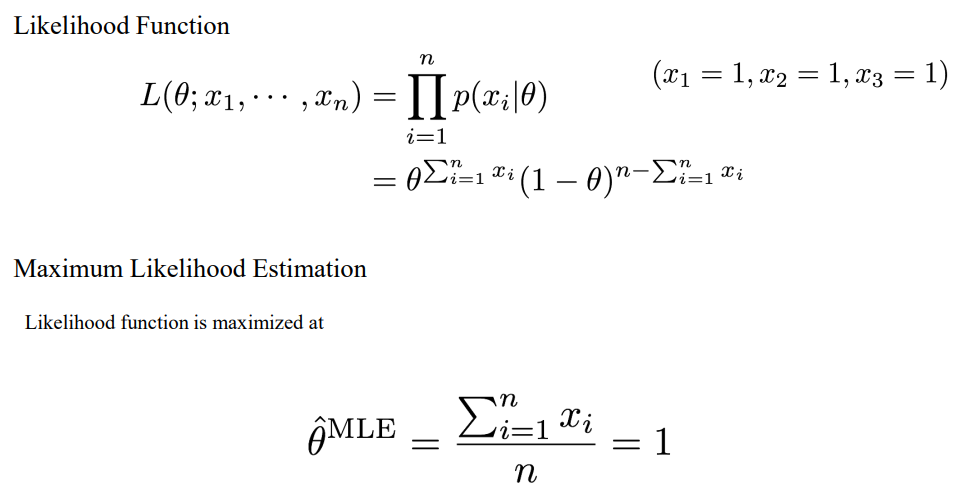
    * 하지만 실제 확률은 1이 아니다.
    * 더 많은 샘플을 얻어야 한다.
    <br/><br/><br/>
* 베이지안 접근 <br/>
    * 사전지식을 이용한다. 이를테면 '앞면이 나올확률은 아마 확률은 0.5 부근 이고, 베타 분포를 따를 거야 (믿음)'
    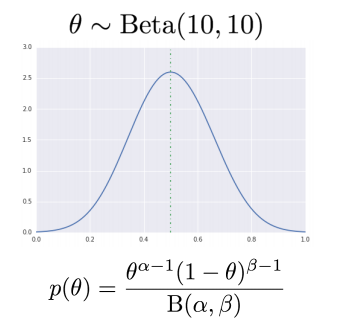 <br/>
    이제는 우리가 구해야할 posterior(사후분포)는 아래와 같다
    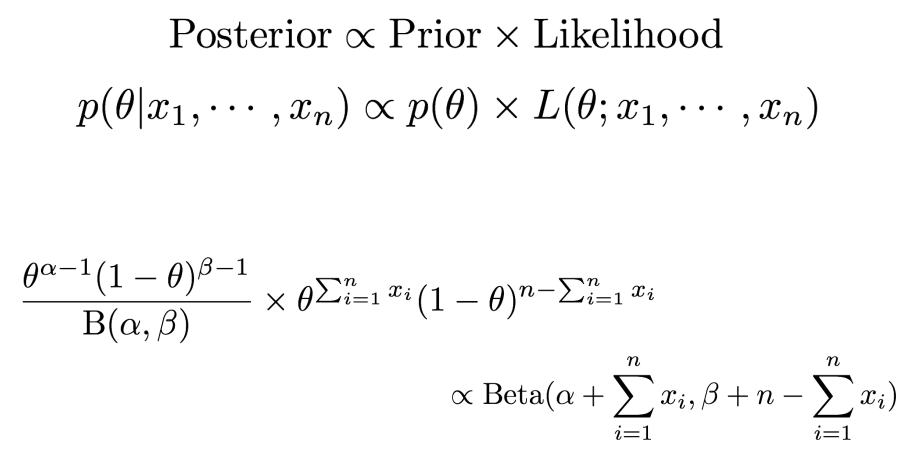
    사후분포는 다음과 같다.
    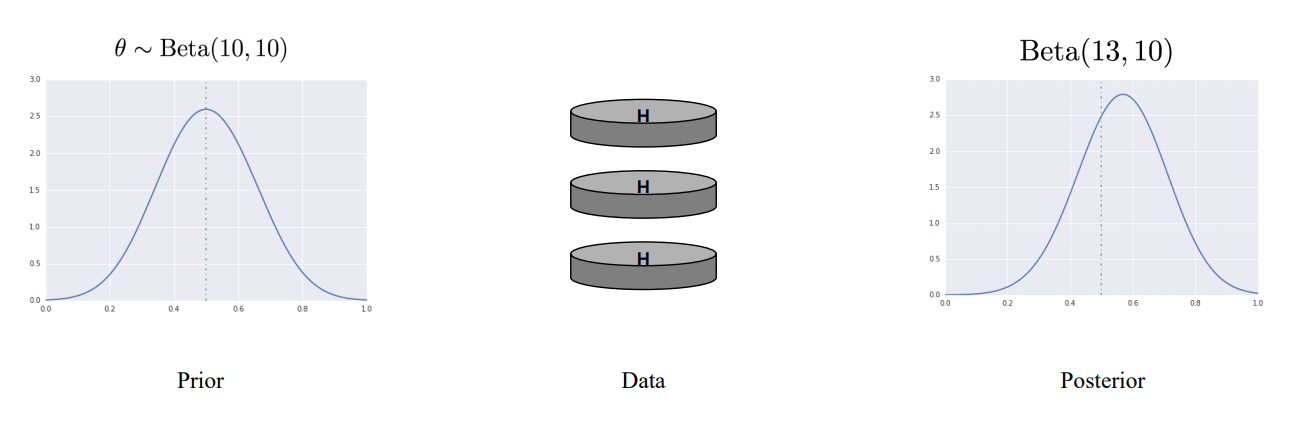
    우리가 알고싶은 것은 앞이나올 확률이다.하지만 우리가 구한 것은 posterior 분포.  
    앞이 나올확률은 ? -> Maximum posterior(MAP) : 분포 내 빈도수가 가장 많은 곳으로 추정 ~ 0.56
    
<br/>

#### `이 예제에서의 빈도주의 접근 방법의 문제는 샘플수가 충분하지 않을때 발생`  
샘플에서 나오지 않은 것을 추론할수가 없음. 베이지안 접근법의 장점이 드러나는 부분.
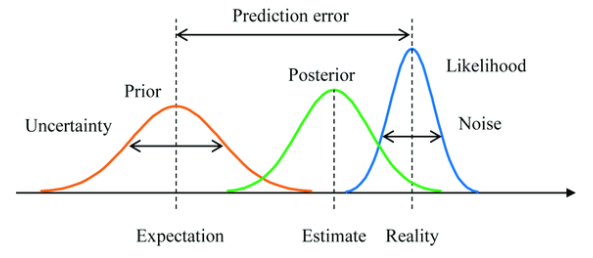
    **-> 사전지식과 데이터와의 절충되는 점에서 사후분포가 형성됨** <br/>
    
    또 다른 목적: 불확실성을 알수가 있음. 

## 2.Variational Inference

베이지안 접근법은 사전지식을 이용해 사후분포를 구하는 것.  
*but 위의 예제처럼 간단하게 계산되는 형태를 실생활에서 발견하기 어려움. 파라미터가 많아지고 차원이 깊어지면 수식적으로 풀어내는데 한계가 발생*   
->**sampling 방법, Markov Chain Monte carlo 등장 **

Sampling base inference
* 샘플을 많이 얻을수록 정확하고, 베이지안 추론영역에서의 golden standard로 여겨진다.
* MCMC 외에도 computing 능력의 향상으로 hemiltonian MC 등 여러 샘플링 기법을 사용.

하지만, sampling의 단점.
* 시간이 오래 걸린다.
* 직관적인 이해가 어렵다.


`복잡한 posterior분포를 간단한 분포로 근사시키는것이 'VI'.
어려운 질문 -> 간단한 예시.`


Variational inference의 기본 아이디어는 우리가 posterior inference를 어떻게 할 지 알고 있는 모델 Qϕ를 가지고 inference를 하되 parameter ϕ를 잘 조정해서 P에 최대한 가깝게 만들자는 것

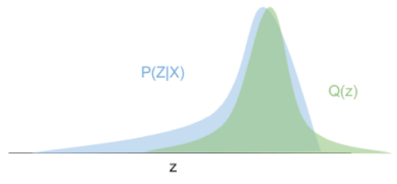

이 때, 두 분포가 "가깝다"는 것을 어떻게 표현할 수 있을까? 여기서 두 분포의 차이를 계산해주는 **Kullback Leibler divergence**

우리가 어떤 확률 분포 p(x)를 가지고 있다. 이 확률 분포를 전송을 해서 정보를 전달을 해야하는데 각각의 변수x에 대해 p(x)를 모두 전달하기에는 정보량도 많고 전달할 수단이 부족하다고 가정하자. 이때 우리는 분포 p(x)를 전달하기보다 이미 정의된 다른 확률 변수q(x)를 대신 전달하려는 생각을 했다. 이렇게 되면 어떤 분포인지, 그리고 분포의 특정 몇가지 값들만 전달하면 되므로 정보량 자체가 엄청나게 줄고 그래서 전송 또한 가능해진다.

그겋다면 어떤 q(x)를 선택해야할까. 핵심정보들을 가지고 있고 p(x)와 최대한 유사해야한다.

kL-divergence는 그 값이 작을수록 유사하고, 0이면 동일한 분포라는 의미.


## 3.tutorial

In [1]:
%matplotlib inline
import theano
import pymc3 as pm # 베이지안 추론에 사용되는 라이브러리.
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
sns.set_style('white')
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
plt.style.use('seaborn-darkgrid')

### 3.1 데이터 만들기

In [2]:
# 데이터셋 만들기. 클러스터링/분류 에 많이 사용되는 데이터.
x,y = make_moons(noise=0.2, random_state=0, n_samples=1000) # 초승달 모양의 두개의 데이터생성.
x = scale(x) # 정규화. 평균을 0으로 맞춰주는
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5)

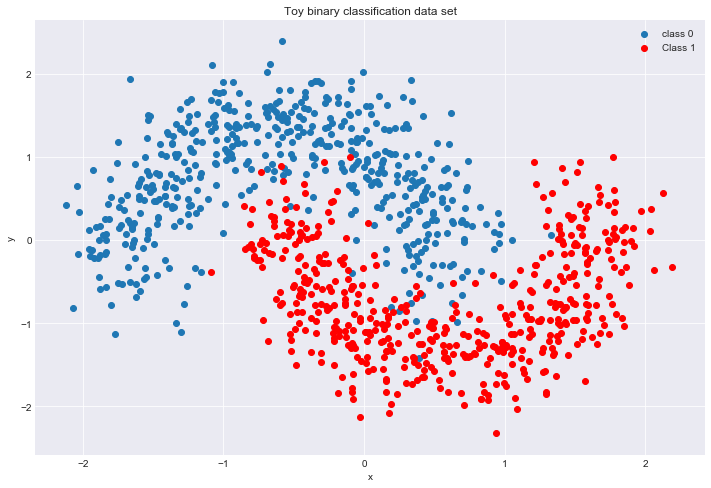

In [3]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x[y==0,0],x[y==0,1], label='class 0')
ax.scatter(x[y==1, 0], x[y==1, 1], color='r', label='Class 1')
sns.despine(); ax.legend()
ax.set(xlabel='x', ylabel='y', title='Toy binary classification data set');

### 3.2 모델만들기

간단한 MLP 모델을 만든다.  
2개의 hidden layer와 각 layer는 5개의 뉴런으로 구성.

In [4]:
np.random.randn(2,5).shape

(2, 5)

In [5]:
def construct_nn(ann_input, ann_output):
    n_hidden = 5
    
    # 임의의 weight 를 생성.
    init_1 = np.random.randn(x.shape[1], n_hidden) # (2,5)형태의 난수 생성
    init_2 = np.random.randn(n_hidden, n_hidden) # (5,5)형태의 난수 생성
    init_out = np.random.randn(n_hidden) # (5,) 형태의 난수 생성
    
    # 베이지안 접근법 .
    with pm.Model() as neural_network:
        # Weights from input to hidden layer
        weights_in_1 = pm.Normal('w_in_1', 0, sd=1, # N(0,1)
                                 shape=(x.shape[1], n_hidden), 
                                 testval=init_1) # 초기값
        
        # Weights from 1st to 2nd layer
        weights_1_2 = pm.Normal('w_1_2', 0, sd=1, 
                                shape=(n_hidden, n_hidden), 
                                testval=init_2)
        
        # Weights from hidden layer to output
        weights_2_out = pm.Normal('w_2_out', 0, sd=1, 
                                  shape=(n_hidden,), 
                                  testval=init_out)
        
        # Build neural-network using tanh activation function
        act_1 = pm.math.tanh(pm.math.dot(ann_input,  # 행렬곱
                                         weights_in_1))
        act_2 = pm.math.tanh(pm.math.dot(act_1, 
                                         weights_1_2))
        act_out = pm.math.sigmoid(pm.math.dot(act_2, 
                                              weights_2_out))
        
        # Binary classification -> Bernoulli likelihood 
        out = pm.Bernoulli('out', 
                           act_out,
                           observed=ann_output,
                           total_size=y_train.shape[0] # IMPORTANT for minibatches
                          )
    return neural_network

ann_input = theano.shared(x_train)
ann_output = theano.shared(y_train)
neural_network = construct_nn(ann_input, ann_output)


In [6]:
from pymc3.theanof import set_tt_rng, MRG_RandomStreams
set_tt_rng(MRG_RandomStreams(42))

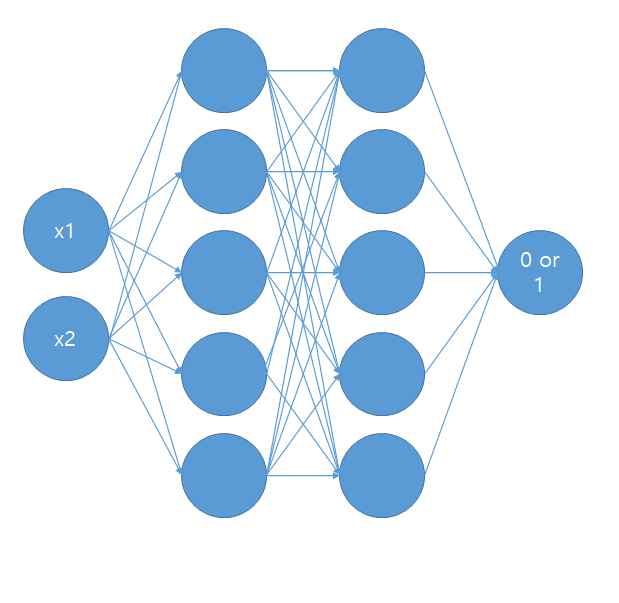

In [7]:
%%time

with neural_network:
    inference = pm.ADVI() # 사용한 method
    approx = pm.fit(n=50000, method=inference)

Average Loss = 121.18: 100%|████████████████████████████████████████████████████| 50000/50000 [05:23<00:00, 154.61it/s]
Finished [100%]: Average Loss = 121.07


Wall time: 6min 2s


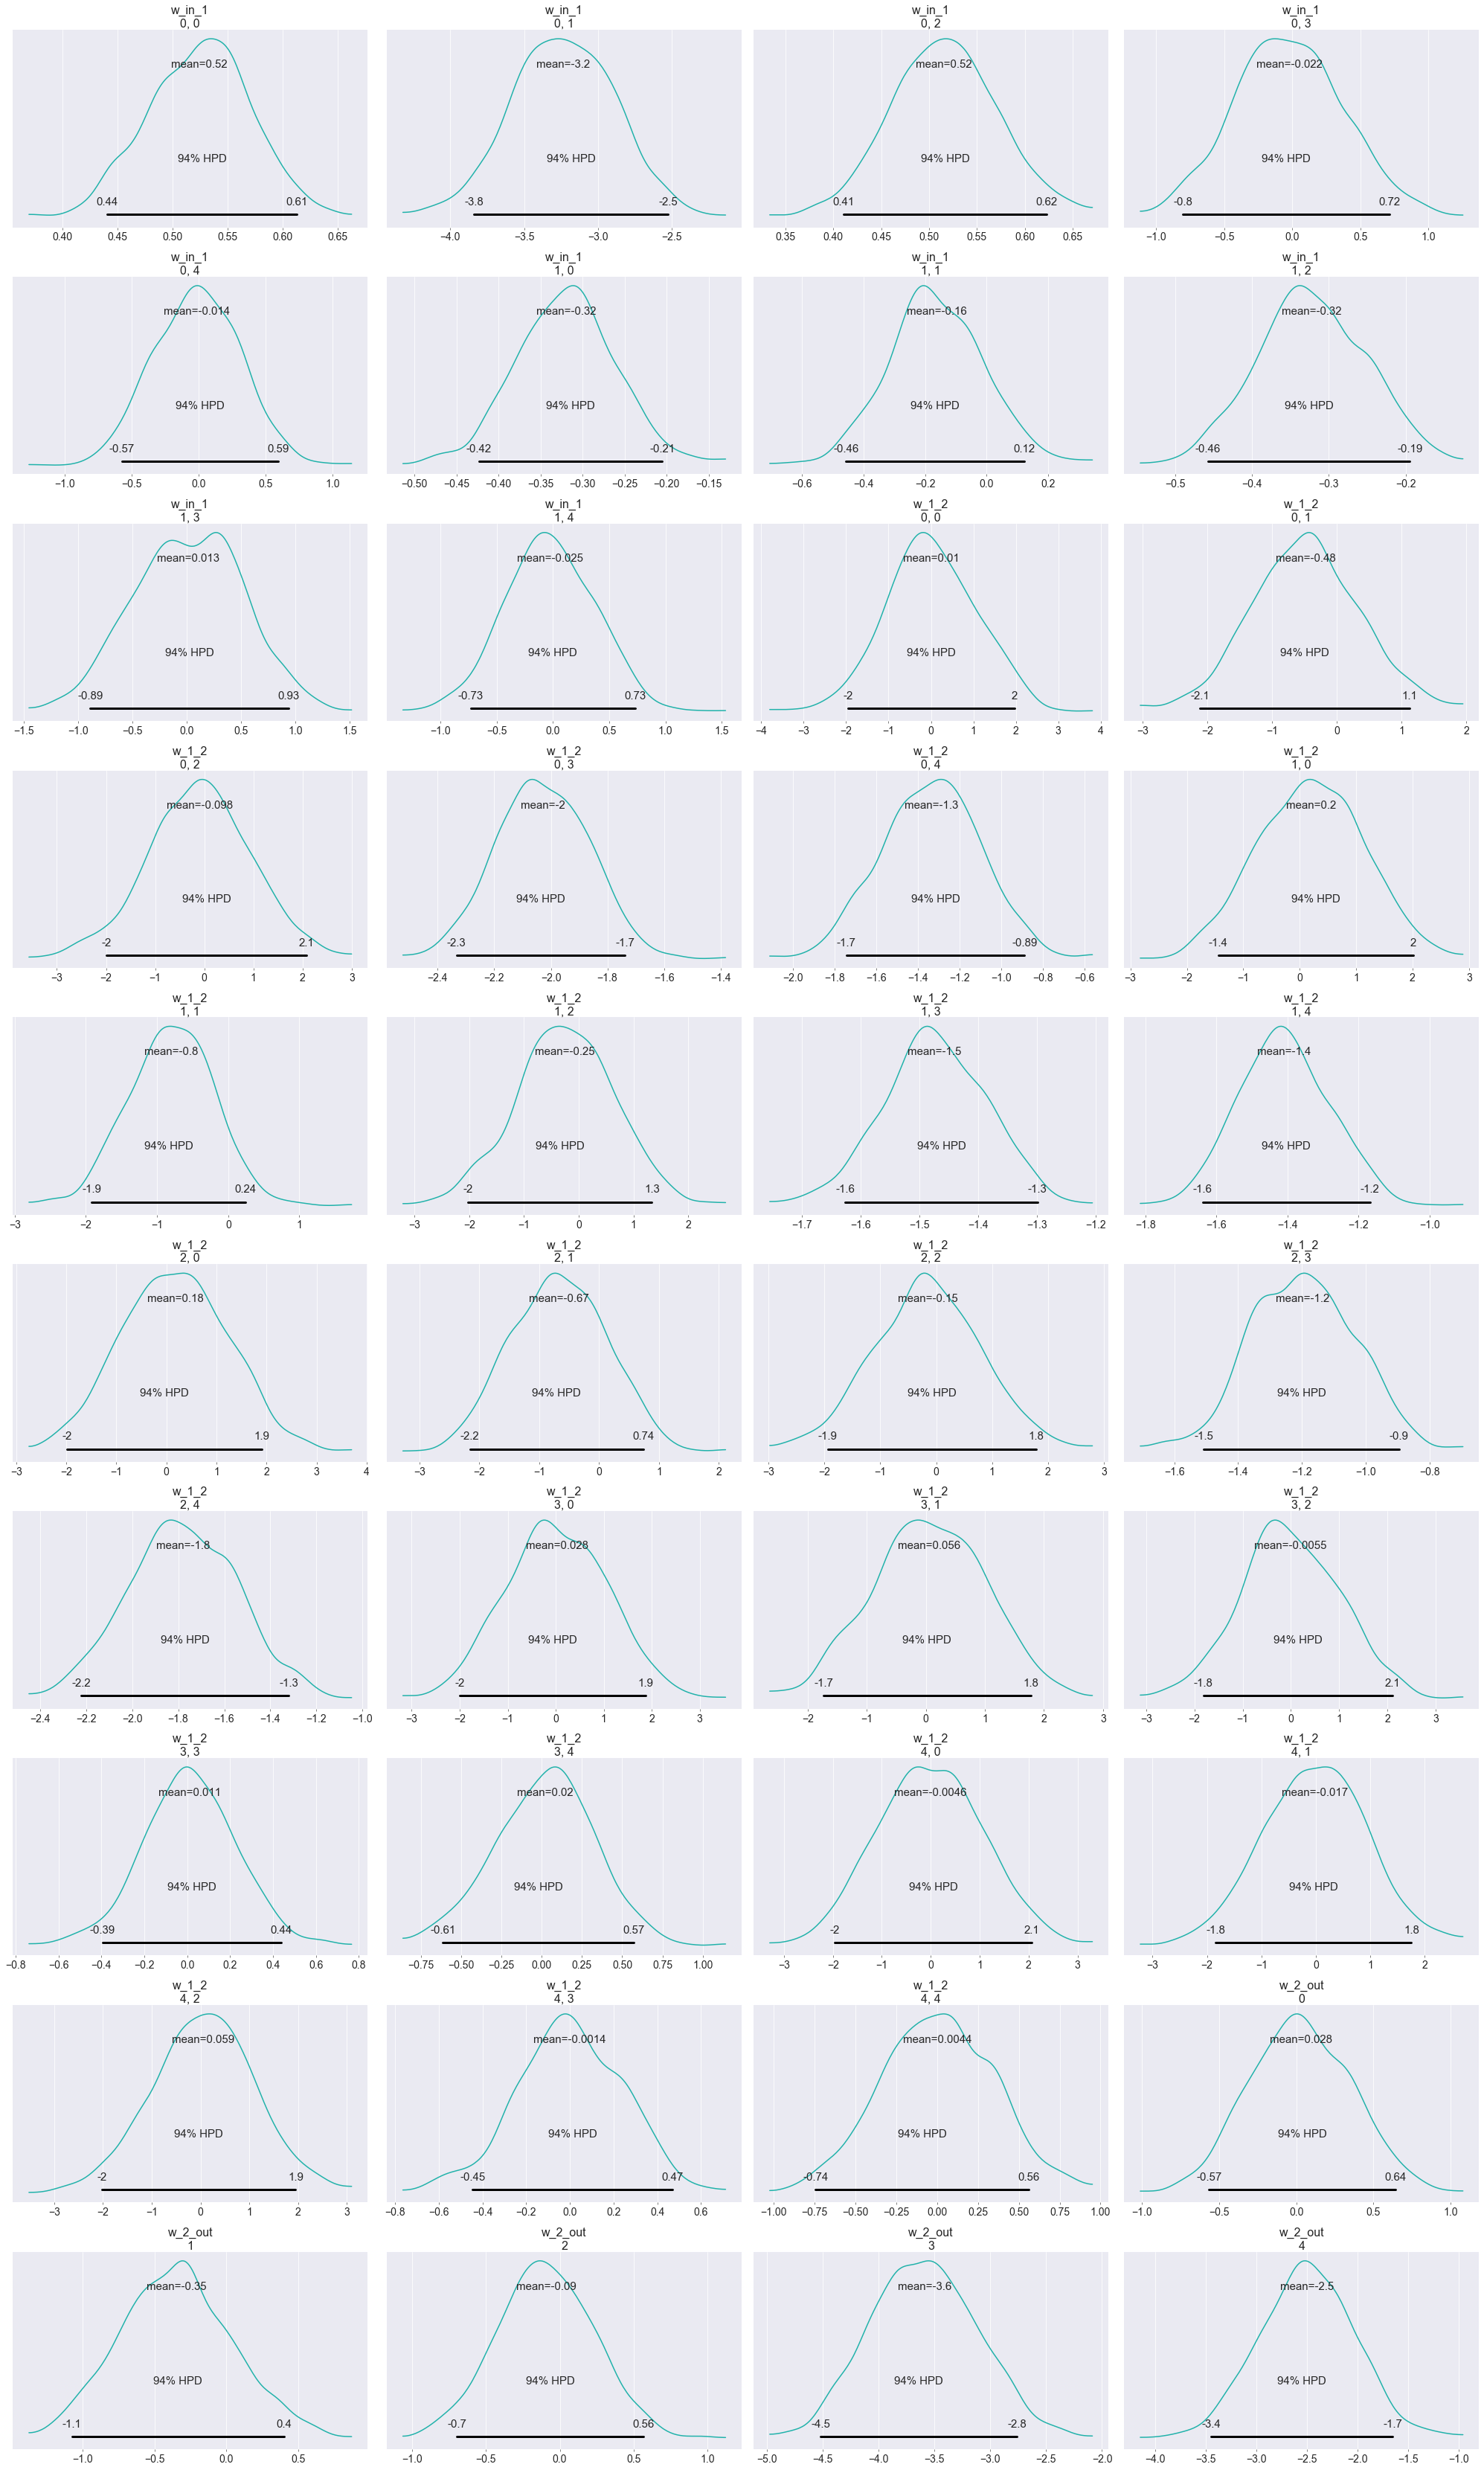

In [8]:
pm.plot_posterior(approx.sample(1000), color='LightSeaGreen');

In [ ]:
with neural_network:
    mc = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [w_2_out, w_1_2, w_in_1]
Sampling 2 chains:   0%|                                                                   | 0/2000 [00:00<?, ?draws/s]

As samples are more convenient to work with, we can very quickly draw samples from the variational approximation using the sample method (this is just sampling from Normal distributions, so not at all the same like MCMC):

In [ ]:
trace = approx.sample(draws=5000)

(ELBO;evidence lower bound) 함수는 KL-divergence와 의미적으로 전혀 다르지 않다. KL-divergence가 가장 작게만드는 것은 ELBO를 가장 최대화하는것과 같은 의미이다.

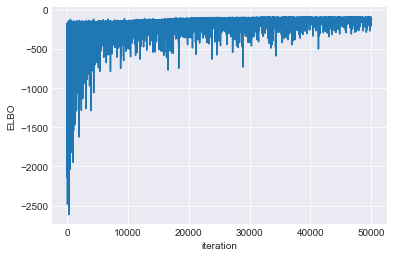

In [18]:
plt.plot(-inference.hist)
plt.ylabel('ELBO')
plt.xlabel('iteration');

posterior predictive check (PPC) 로부터 샘플링을 하여 비교해보자

In [19]:
# Replace arrays our NN references with the test data
ann_input.set_value(x_test)
ann_output.set_value(y_test)

with neural_network:
    ppc = pm.sample_ppc(trace, samples=500, progressbar=False)

# Use probability of > 0.5 to assume prediction of class 1
pred = ppc['out'].mean(axis=0) > 0.5

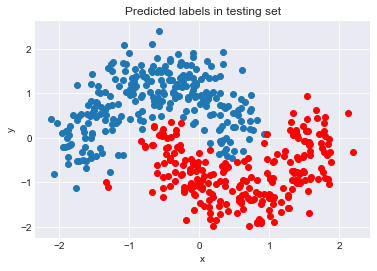

In [20]:
fig, ax = plt.subplots()
ax.scatter(x_test[pred==0, 0], x_test[pred==0, 1])
ax.scatter(x_test[pred==1, 0], x_test[pred==1, 1], color='r')
sns.despine()
ax.set(title='Predicted labels in testing set', xlabel='x', ylabel='y');

In [21]:
print('Accuracy = {}%'.format((y_test == pred).mean() * 100))

Accuracy = 94.0%


In [48]:
## 4.lets look at what the classifier has learned

In [22]:
grid = pm.floatX(np.mgrid[-3:3:100j,-3:3:100j])
grid_2d = grid.reshape(2, -1).T
dummy_out = np.ones(grid.shape[1], dtype=np.int8)

In [23]:
ann_input.set_value(grid_2d)
ann_output.set_value(dummy_out)

with neural_network:
    ppc = pm.sample_ppc(trace, samples=500, progressbar=False)

prob-surface

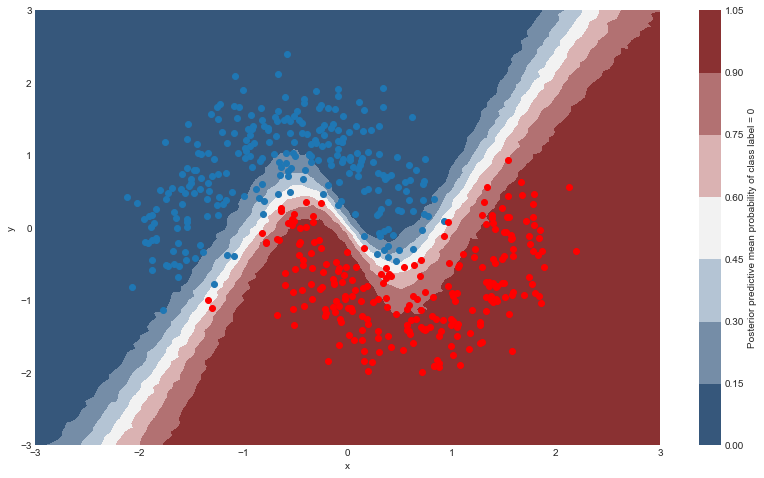

In [24]:
cmap = sns.diverging_palette(250, 12, s=85, l=25, as_cmap=True)
fig, ax = plt.subplots(figsize=(14, 8))
contour = ax.contourf(grid[0], grid[1], ppc['out'].mean(axis=0).reshape(100, 100), cmap=cmap)
ax.scatter(x_test[pred==0, 0], x_test[pred==0, 1])
ax.scatter(x_test[pred==1, 0], x_test[pred==1, 1], color='r')
cbar = plt.colorbar(contour, ax=ax)
_ = ax.set(xlim=(-3, 3), ylim=(-3, 3), xlabel='x', ylabel='y');
cbar.ax.set_ylabel('Posterior predictive mean probability of class label = 0');

Uncertainty in predicted value  
So far, everything I showed we could have done with a non-Bayesian Neural Network. The mean of the posterior predictive for each class-label should be identical to maximum likelihood predicted values. However, we can also look at the standard deviation of the posterior predictive to get a sense for the uncertainty in our predictions. Here is what that looks like:

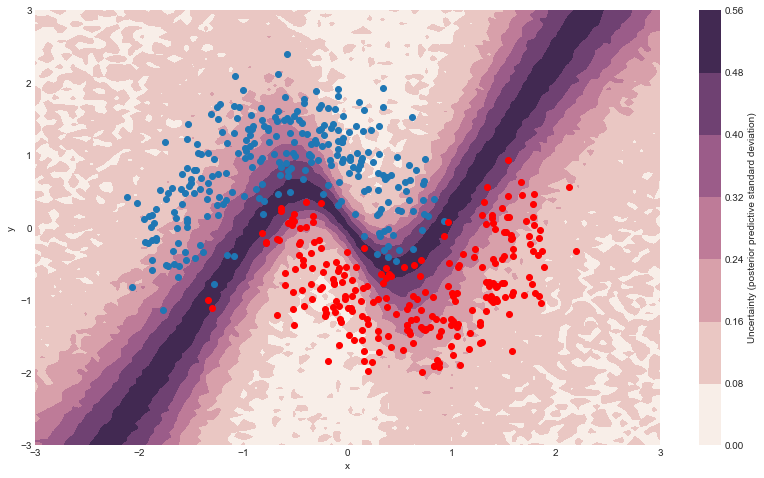

In [25]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, ax = plt.subplots(figsize=(14, 8))
contour = ax.contourf(grid[0], grid[1], ppc['out'].std(axis=0).reshape(100, 100), cmap=cmap)
ax.scatter(x_test[pred==0, 0], x_test[pred==0, 1])
ax.scatter(x_test[pred==1, 0], x_test[pred==1, 1], color='r')
cbar = plt.colorbar(contour, ax=ax)
_ = ax.set(xlim=(-3, 3), ylim=(-3, 3), xlabel='x', ylabel='y');
cbar.ax.set_ylabel('Uncertainty (posterior predictive standard deviation)');

We can see that very close to the decision boundary, our uncertainty as to which label to predict is highest. You can imagine that associating predictions with uncertainty is a critical property for many applications like health care. To further maximize accuracy, we might want to train the model primarily on samples from that high-uncertainty region.

In [26]:
minibatch_x = pm.Minibatch(x_train, batch_size=32)
minibatch_y = pm.Minibatch(y_train, batch_size=32)

neural_network_minibatch = construct_nn(minibatch_x, minibatch_y)
with neural_network_minibatch:
    inference = pm.ADVI()
    approx = pm.fit(40000, method=inference)

Average Loss = 8.0775: 100%|████████████████████████████████████████████████████| 40000/40000 [01:46<00:00, 375.70it/s]
Finished [100%]: Average Loss = 8.0709


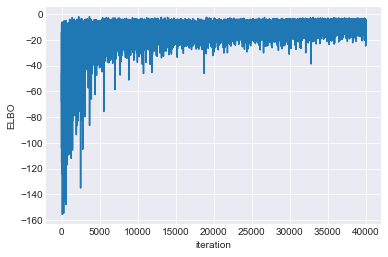

In [27]:
plt.plot(-inference.hist)
plt.ylabel('ELBO')
plt.xlabel('iteration');